# 6.3 Geographic Visualization 

### This script contains the following:
#### 1. Import data and libraries
#### 2. Data wrangling
#### 3. Data cleaning
#### 4. Plotting a choropleth
#### 5. Discuss the results

### 1. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command prompts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Import ".json" file for the U.S. 

country_geo = r'C:/Users/thomasradio/Documents/Jupyter/230808 Tom Radio Achievement 6 Project/03 Scripts/us-states.json'

In [4]:
# Use a relative path
country_geo = 'us-states.json'

In [5]:
# Open the JSON file using the relative path
with open(country_geo, 'r') as f:
    data = json.load(f)

In [6]:
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [7]:
# Import the pugetsound_tides_currents_lunar data using a relative path
pugetsound_tides_currents = pd.read_csv('pugetsound_tides_currents_lunar.csv')

In [8]:
pugetsound_tides_currents.head()

,Unnamed: 0,Dive_Site,Date,Day_of_Week,Time,Event,Current_Speed_(knots),Height (cm),Height (ft),Current_Station_Name,Current_Station_ID,Tide_Station_Name,Tide_Station_ID,Latitude,Longitude,Moon Illuminated
0,0,Alki,1/1/24,Monday,0:24:00,ebb,-0.5,NaN,NaN,HARBOR ISLAND WEST,PUG1507,NaN,NaN,47.588707,-122.380009,0.75
1,1,Alki,1/1/24,Monday,1:34:00,Low,NaN,20.0,0.66,NaN,NaN,LOCKHEED SHIPYARD,9447110.0,47.588707,-122.380009,0.75
2,2,Alki,1/1/24,Monday,4:00:00,slack,0.0,NaN,NaN,HARBOR ISLAND WEST,PUG1508,NaN,NaN,47.588707,-122.380009,0.75
3,3,Alki,1/1/24,Monday,6:12:00,flood,0.1,NaN,NaN,HARBOR ISLAND WEST,PUG1509,NaN,NaN,47.588707,-122.380009,0.75
4,4,Alki,1/1/24,Monday,8:36:00,slack,0.0,NaN,NaN,HARBOR ISLAND WEST,PUG1510,NaN,NaN,47.588707,-122.380009,0.75


### 2. Data wrangling

In [9]:
# Drop the 'Unnamed: 0' column
pugetsound_tides_currents = pugetsound_tides_currents.drop(columns=['Unnamed: 0'])

In [10]:
pugetsound_tides_currents.head()

,Dive_Site,Date,Day_of_Week,Time,Event,Current_Speed_(knots),Height (cm),Height (ft),Current_Station_Name,Current_Station_ID,Tide_Station_Name,Tide_Station_ID,Latitude,Longitude,Moon Illuminated
0,Alki,1/1/24,Monday,0:24:00,ebb,-0.5,NaN,NaN,HARBOR ISLAND WEST,PUG1507,NaN,NaN,47.588707,-122.380009,0.75
1,Alki,1/1/24,Monday,1:34:00,Low,NaN,20.0,0.66,NaN,NaN,LOCKHEED SHIPYARD,9447110.0,47.588707,-122.380009,0.75
2,Alki,1/1/24,Monday,4:00:00,slack,0.0,NaN,NaN,HARBOR ISLAND WEST,PUG1508,NaN,NaN,47.588707,-122.380009,0.75
3,Alki,1/1/24,Monday,6:12:00,flood,0.1,NaN,NaN,HARBOR ISLAND WEST,PUG1509,NaN,NaN,47.588707,-122.380009,0.75
4,Alki,1/1/24,Monday,8:36:00,slack,0.0,NaN,NaN,HARBOR ISLAND WEST,PUG1510,NaN,NaN,47.588707,-122.380009,0.75


In [11]:
pugetsound_tides_currents.shape

(16626, 15)

In [12]:
pugetsound_tides_currents.dtypes

Dive_Site                 object
Date                      object
Day_of_Week               object
Time                      object
Event                     object
Current_Speed_(knots)    float64
Height (cm)              float64
Height (ft)              float64
Current_Station_Name      object
Current_Station_ID        object
Tide_Station_Name         object
Tide_Station_ID          float64
Latitude                 float64
Longitude                float64
Moon Illuminated         float64
dtype: object

In [13]:
# Convert the "Date" column to datetime format
pugetsound_tides_currents['Date'] = pd.to_datetime(pugetsound_tides_currents['Date'], format='%m/%d/%y')

In [14]:
pugetsound_tides_currents.dtypes

Dive_Site                        object
Date                     datetime64[ns]
Day_of_Week                      object
Time                             object
Event                            object
Current_Speed_(knots)           float64
Height (cm)                     float64
Height (ft)                     float64
Current_Station_Name             object
Current_Station_ID               object
Tide_Station_Name                object
Tide_Station_ID                 float64
Latitude                        float64
Longitude                       float64
Moon Illuminated                float64
dtype: object

In [15]:
pugetsound_tides_currents.shape

(16626, 15)

In [16]:
pugetsound_tides_currents.head()

,Dive_Site,Date,Day_of_Week,Time,Event,Current_Speed_(knots),Height (cm),Height (ft),Current_Station_Name,Current_Station_ID,Tide_Station_Name,Tide_Station_ID,Latitude,Longitude,Moon Illuminated
0,Alki,2024-01-01,Monday,0:24:00,ebb,-0.5,NaN,NaN,HARBOR ISLAND WEST,PUG1507,NaN,NaN,47.588707,-122.380009,0.75
1,Alki,2024-01-01,Monday,1:34:00,Low,NaN,20.0,0.66,NaN,NaN,LOCKHEED SHIPYARD,9447110.0,47.588707,-122.380009,0.75
2,Alki,2024-01-01,Monday,4:00:00,slack,0.0,NaN,NaN,HARBOR ISLAND WEST,PUG1508,NaN,NaN,47.588707,-122.380009,0.75
3,Alki,2024-01-01,Monday,6:12:00,flood,0.1,NaN,NaN,HARBOR ISLAND WEST,PUG1509,NaN,NaN,47.588707,-122.380009,0.75
4,Alki,2024-01-01,Monday,8:36:00,slack,0.0,NaN,NaN,HARBOR ISLAND WEST,PUG1510,NaN,NaN,47.588707,-122.380009,0.75


In [17]:
# Check unique values in Longitude
unique_values = pugetsound_tides_currents['Longitude'].unique()
print(unique_values)

[-122.3800092 -122.6449002 -123.704473  -122.5444392]


In [18]:
# Check unique values in Latitude
unique_values = pugetsound_tides_currents['Latitude'].unique()
print(unique_values)

[47.5887069  48.40572205 48.16745522 47.26533573]


In [19]:
# Add a new column 'STATE_NAME' with value 'Washington'
pugetsound_tides_currents['STATE_NAME'] = 'Washington'

In [20]:
pugetsound_tides_currents.head()

,Dive_Site,Date,Day_of_Week,Time,Event,Current_Speed_(knots),Height (cm),Height (ft),Current_Station_Name,Current_Station_ID,Tide_Station_Name,Tide_Station_ID,Latitude,Longitude,Moon Illuminated,STATE_NAME
0,Alki,2024-01-01,Monday,0:24:00,ebb,-0.5,NaN,NaN,HARBOR ISLAND WEST,PUG1507,NaN,NaN,47.588707,-122.380009,0.75,Washington
1,Alki,2024-01-01,Monday,1:34:00,Low,NaN,20.0,0.66,NaN,NaN,LOCKHEED SHIPYARD,9447110.0,47.588707,-122.380009,0.75,Washington
2,Alki,2024-01-01,Monday,4:00:00,slack,0.0,NaN,NaN,HARBOR ISLAND WEST,PUG1508,NaN,NaN,47.588707,-122.380009,0.75,Washington
3,Alki,2024-01-01,Monday,6:12:00,flood,0.1,NaN,NaN,HARBOR ISLAND WEST,PUG1509,NaN,NaN,47.588707,-122.380009,0.75,Washington
4,Alki,2024-01-01,Monday,8:36:00,slack,0.0,NaN,NaN,HARBOR ISLAND WEST,PUG1510,NaN,NaN,47.588707,-122.380009,0.75,Washington


In [21]:
pugetsound_tides_currents.dtypes

Dive_Site                        object
Date                     datetime64[ns]
Day_of_Week                      object
Time                             object
Event                            object
Current_Speed_(knots)           float64
Height (cm)                     float64
Height (ft)                     float64
Current_Station_Name             object
Current_Station_ID               object
Tide_Station_Name                object
Tide_Station_ID                 float64
Latitude                        float64
Longitude                       float64
Moon Illuminated                float64
STATE_NAME                       object
dtype: object

In [22]:
# Define a function to remove "-" signs and convert to positive
def remove_minus_and_make_positive(value):
    if isinstance(value, (int, float)):  # Make sure the value is numeric
        return abs(value)  # Convert to positive
    return value  # Keep non-numeric values unchanged

# Apply the function to the "Current_Speed_(knots)" column
pugetsound_tides_currents['Current_Speed_(knots)'] = pugetsound_tides_currents['Current_Speed_(knots)'].apply(remove_minus_and_make_positive)

In [23]:
pugetsound_tides_currents.head()

,Dive_Site,Date,Day_of_Week,Time,Event,Current_Speed_(knots),Height (cm),Height (ft),Current_Station_Name,Current_Station_ID,Tide_Station_Name,Tide_Station_ID,Latitude,Longitude,Moon Illuminated,STATE_NAME
0,Alki,2024-01-01,Monday,0:24:00,ebb,0.5,NaN,NaN,HARBOR ISLAND WEST,PUG1507,NaN,NaN,47.588707,-122.380009,0.75,Washington
1,Alki,2024-01-01,Monday,1:34:00,Low,NaN,20.0,0.66,NaN,NaN,LOCKHEED SHIPYARD,9447110.0,47.588707,-122.380009,0.75,Washington
2,Alki,2024-01-01,Monday,4:00:00,slack,0.0,NaN,NaN,HARBOR ISLAND WEST,PUG1508,NaN,NaN,47.588707,-122.380009,0.75,Washington
3,Alki,2024-01-01,Monday,6:12:00,flood,0.1,NaN,NaN,HARBOR ISLAND WEST,PUG1509,NaN,NaN,47.588707,-122.380009,0.75,Washington
4,Alki,2024-01-01,Monday,8:36:00,slack,0.0,NaN,NaN,HARBOR ISLAND WEST,PUG1510,NaN,NaN,47.588707,-122.380009,0.75,Washington


In [24]:
# Select only the necessary columns and put them in a list called columns

columns = ["Dive_Site", "Current_Speed_(knots)", "Latitude", "Longitude", "STATE_NAME"]

In [25]:
# Create a subset

washington_dive_sites = pugetsound_tides_currents[columns]

In [26]:
washington_dive_sites

,Dive_Site,Current_Speed_(knots),Latitude,Longitude,STATE_NAME
0,Alki,0.5,47.588707,-122.380009,Washington
1,Alki,NaN,47.588707,-122.380009,Washington
2,Alki,0.0,47.588707,-122.380009,Washington
3,Alki,0.1,47.588707,-122.380009,Washington
4,Alki,0.0,47.588707,-122.380009,Washington
...,...,...,...,...,...
16621,Tacoma Narrows,2.2,47.265336,-122.544439,Washington
16622,Tacoma Narrows,NaN,47.265336,-122.544439,Washington
16623,Tacoma Narrows,0.0,47.265336,-122.544439,Washington
16624,Tacoma Narrows,5.0,47.265336,-122.544439,Washington


In [27]:
washington_dive_sites.dtypes

Dive_Site                 object
Current_Speed_(knots)    float64
Latitude                 float64
Longitude                float64
STATE_NAME                object
dtype: object

In [28]:
washington_dive_sites.shape

(16626, 5)

### 3. Conduct consistency checks

In [29]:
# Check for missing values

washington_dive_sites.isnull().sum()

Dive_Site                   0
Current_Speed_(knots)    5626
Latitude                    0
Longitude                   0
STATE_NAME                  0
dtype: int64

In [30]:
# Remove rows with missing values in 'Current_Speed_(knots)'
washington_dive_sites = washington_dive_sites.dropna(subset=['Current_Speed_(knots)'])

In [31]:
# Last check for NaN

washington_dive_sites.isnull().sum()

Dive_Site                0
Current_Speed_(knots)    0
Latitude                 0
Longitude                0
STATE_NAME               0
dtype: int64

##### Duplicates check

In [32]:
dups = washington_dive_sites.duplicated()

In [33]:
dups.shape # no dups

(11000,)

##### Extreme values checks

<Axes: xlabel='Current_Speed_(knots)', ylabel='Count'>

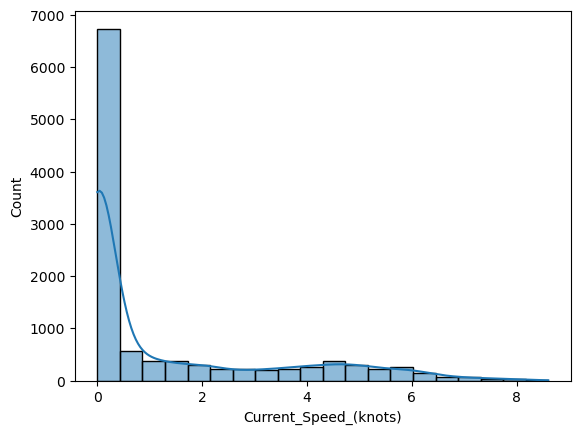

In [34]:
# shows extreme values for 'Current_Speed_(knots)'
sns.histplot(washington_dive_sites['Current_Speed_(knots)'], bins=20, kde = True)

In [35]:
washington_dive_sites.head()

,Dive_Site,Current_Speed_(knots),Latitude,Longitude,STATE_NAME
0,Alki,0.5,47.588707,-122.380009,Washington
2,Alki,0.0,47.588707,-122.380009,Washington
3,Alki,0.1,47.588707,-122.380009,Washington
4,Alki,0.0,47.588707,-122.380009,Washington
6,Alki,0.2,47.588707,-122.380009,Washington


### 4. Plotting a choropleth

In [36]:
# Create a data frame with just the data to be plotted

data_to_plot = washington_dive_sites[['STATE_NAME','Dive_Site', 'Latitude', 'Longitude', 'Current_Speed_(knots)']]
data_to_plot

,STATE_NAME,Dive_Site,Latitude,Longitude,Current_Speed_(knots)
0,Washington,Alki,47.588707,-122.380009,0.5
2,Washington,Alki,47.588707,-122.380009,0.0
3,Washington,Alki,47.588707,-122.380009,0.1
4,Washington,Alki,47.588707,-122.380009,0.0
6,Washington,Alki,47.588707,-122.380009,0.2
...,...,...,...,...,...
16618,Washington,Tacoma Narrows,47.265336,-122.544439,2.5
16620,Washington,Tacoma Narrows,47.265336,-122.544439,0.0
16621,Washington,Tacoma Narrows,47.265336,-122.544439,2.2
16623,Washington,Tacoma Narrows,47.265336,-122.544439,0.0


In [37]:
# Calculate average current speed for each dive site
average_speeds = washington_dive_sites.groupby('Dive_Site')['Current_Speed_(knots)'].mean().reset_index()

In [38]:
average_speeds

,Dive_Site,Current_Speed_(knots)
0,Alki,0.143077
1,Deception Pass,2.525168
2,Salt Creek,0.573282
3,Tacoma Narrows,1.823020


In [39]:
# Create a map centered on Washington state
map = folium.Map(location=[47.5, -120.5], zoom_start=7)

In [40]:
map

In [41]:
# Add the GeoJSON layer for all states
folium.GeoJson(
    country_geo,
    name='geojson',
    style_function=lambda feature: {
        'fillColor': 'rgba(0, 0, 255, 0.25)' if feature['properties']['name'] == 'Washington' else 'transparent',
        'color': 'black',
        'weight': 0.75,
        'fillOpacity': 0.5,
    }
).add_to(map)

In [42]:
map

In [43]:
# Determine color scale range based on min and max average speeds
min_speed = average_speeds['Current_Speed_(knots)'].min()
max_speed = average_speeds['Current_Speed_(knots)'].max()

In [44]:
# Add circle markers for each dive site with shading based on average current speed
for _, row in average_speeds.iterrows():
    dive_site = row['Dive_Site']
    avg_speed = row['Current_Speed_(knots)']

    site_data = washington_dive_sites[washington_dive_sites['Dive_Site'] == dive_site]
    avg_lat = site_data['Latitude'].mean()
    avg_lon = site_data['Longitude'].mean()

    # Calculate the fill color based on speed range
    color_scale = (avg_speed - min_speed) / (max_speed - min_speed)
    fill_color = f'rgb({int(255 * color_scale)}, {int(255 * (1 - color_scale))}, 0)'

    folium.CircleMarker(
        location=[avg_lat, avg_lon],
        radius=10,
        color=None,
        fill=True,
        fill_color=fill_color,
        fill_opacity=0.7,
        popup=f"Dive Site: {dive_site}<br>Average Current Speed: {avg_speed}",
    ).add_to(map)

In [45]:
# Add a legend for the circle markers
color_scale_legend = folium.LinearColormap(
    colors=['green', 'red'],
    vmin=min_speed,
    vmax=max_speed,
    caption='Average Current Speed (knots)',
)
color_scale_legend.add_to(map)

In [46]:
# Save the map
map.save('shaded_dive_sites_map.html')

In [47]:
map

### 5. Discuss the results

#### Does the analysis answer any of your existing research questions?

Yes, the analysis has provided insights into the average currents at each dive site. It's clear that two of the sites generally have gentle currents, making them suitable for diving on most days. On the other hand, the remaining two sites experience stronger currents on average, requiring careful planning to ensure safe dives during times of lighter currents.

#### Does the analysis lead you to any new research questions?

Are there particular dive sites in the region that consistently experience milder currents, making them dependable choices even during periods when other sites might have stronger currents?

Can certain dive sites in the region be identified as consistently safe options across all phases of the lunar cycle, reducing the variability associated with lunar influences?